In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from mpl_toolkits import mplot3d
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [17]:
print(plt.rcParams["figure.figsize"])
backupPlotSize = [6.0, 4.0]

[6.0, 4.0]


In [18]:
def drawEllipse(mu, cov, n_std=1):
	# input:
	# mu: the mean value of the data
	# cov: the covariance matrix of the data
	# n_std: sigma value for the size of the ellipse

	# source: https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html

	pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
	ell_radius_x = np.sqrt(1 + pearson)
	ell_radius_y = np.sqrt(1 - pearson)
	ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', edgecolor='purple')

	scale_x = np.sqrt(cov[0, 0]) * n_std
	scale_y = np.sqrt(cov[1, 1]) * n_std

	transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mu[0],mu[1])

	ellipse.set_transform(transf + plt.gca().transData)

	plt.gca().add_patch(ellipse)

### 1.a) Direct PCA

[[1. 6. 5. 1. 0.]
 [0. 2. 4. 3. 1.]]
[[2.6]
 [2. ]]
U [[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[8.18975683 1.61024317]


(-5.571083952079367,
 6.551003997718067,
 -1.2640084858308853,
 4.2506670707538525)

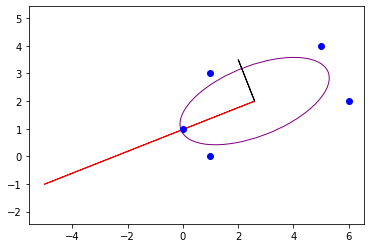

In [19]:
points=np.loadtxt("data/points.txt")
nInputs = len(points)

#put in the form to match the equations
points = points.T
print(points)

#compute the mean
mean = np.mean(points,1).reshape(2,1)
print(mean)

#center the data
pointsCentered = points - mean

#calculate the covariance matrix
covMat = pointsCentered@pointsCentered.T / (nInputs -1 )
#print(covMat)
#covMat = np.cov(pointsCentered)
#print(covMat)


#calculate the SVD of the covariance matrix
u,s,vh = np.linalg.svd(covMat, full_matrices=True)

print("U",u)

#project to subspace
projected = u.T@(pointsCentered)
#print(projected)

#transform back to original space
origSpace = u@projected + mean
#print(origSpace)

#plot the values in the original space
plt.plot(origSpace[0,:], origSpace[1,:], 'bo')

drawEllipse(mean, covMat)

#get the eigenvectors and scale by their eigenvalue
v1 = u[:,0] *s[0]
v2 = u[:,1] * s[1]

print(s)

#plot the eigenvectors
plt.arrow(mean[0,0], mean[1,0], v1[0], v1[1], color="red")
plt.arrow(mean[0,0], mean[1,0], v2[0], v2[1])

plt.axis("equal")

#plt.quiver(mean[0,0], mean[1,0], mean[0,0], mean[1,0], u[:,0], u[:,1], angles='xy', scale_units='xy', scale=1)




In [20]:
#vrne sam en eigenvector, messy ampak jbg
def directPCA(points):
    nInputs = points.shape[1]
    #compute the mean
    mean = np.mean(points,1).reshape(2,1)

    pointsCentered = points - mean

    covMat = pointsCentered@pointsCentered.T / (nInputs -1 )

    u,s,vh = np.linalg.svd(covMat, full_matrices=True)

    #remove the second eigenvector, project only to first dimension
    u[:,1] = [0,0]

    projected = u.T@(pointsCentered)

    origSpace = u@projected + mean

    #plot values in original Space
    plt.plot(origSpace[0,:], origSpace[1,:], 'bo')
    drawEllipse(mean, covMat)

    #get the eigenvectors and scale by their eigenvalue
    v1 = u[:,0] *s[0]
    v2 = u[:,1] * s[1]

    plt.arrow(mean[0,0], mean[1,0], v1[0], v1[1], color="red")
    plt.arrow(mean[0,0], mean[1,0], v2[0], v2[1])

    plt.axis("equal")

    return origSpace, v1

### 1.c) How much percentage will we retain, if we discard the second eigenvalue

If we discard the second, we retain: 0.8356894724407343 % of information


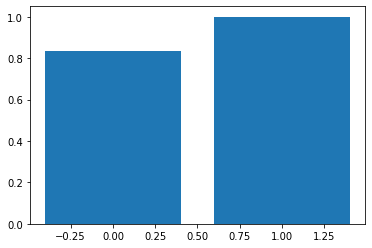

In [21]:
#cumsum of eigenvalues
cumPercentage = np.cumsum(s)/np.sum(s)
plt.show()
plt.bar(np.arange(len(cumPercentage)),cumPercentage)

print("If we discard the second, we retain:", cumPercentage[0], "% of information")

[8.18975683 1.61024317]


(-5.548094614431275,
 6.068227907108119,
 -1.2457849181170233,
 3.8679721487627505)

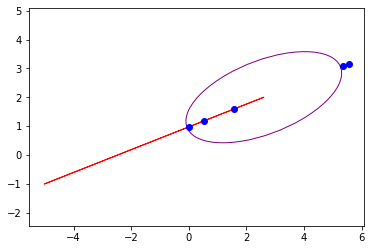

In [22]:
u,s,vh = np.linalg.svd(covMat, full_matrices=True)

#remove the second eigenvector, project only to first dimension
u[:,1] = [0,0]

projected = u.T@(pointsCentered)

origSpace = u@projected + mean

#plot values in original Space
plt.plot(origSpace[0,:], origSpace[1,:], 'bo')
drawEllipse(mean, covMat)

#get the eigenvectors and scale by their eigenvalue
v1 = u[:,0] *s[0]
v2 = u[:,1] * s[1]

print(s)

plt.arrow(mean[0,0], mean[1,0], v1[0], v1[1], color="red")
plt.arrow(mean[0,0], mean[1,0], v2[0], v2[1])

plt.axis("equal")

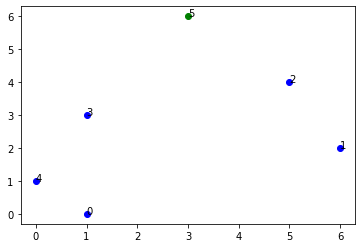

Its closest to the point index: 2
Its closest to the point index: 1


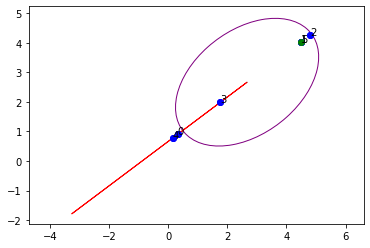

In [23]:
points=np.loadtxt("data/points.txt")
points = points.T
newPoint = np.array([3,6]).reshape(2,1)

for i in range(nInputs):    
    plt.plot(points[0,i], points[1,i], 'bo')
    plt.text(points[0,i], points[1,i], i, color="black")

plt.plot(newPoint[0], newPoint[1], 'go')
plt.text(newPoint[0], newPoint[1], nInputs, color="black")
plt.show()

#izracunamo evklidsko razdaljo do vseh tock
distances = [np.sqrt(np.sum((point - newPoint.T)**2)) for point in points.T]
closestIndx  = np.argmin(distances)
print("Its closest to the point index:", closestIndx) #the closest point

#append the new point to the points
points = np.append(points, newPoint, 1)

#perform PCA
origSpace, v1 = directPCA(points)

#plot the points
plt.plot(origSpace[0,:], origSpace[1,:], 'bo')
plt.plot(origSpace[0,-1], origSpace[1,-1], 'go')

plt.axis("equal")

distances = [np.sqrt(np.sum((point - newPoint.T)**2)) for point in origSpace[:, 0:5].T]
closestIndx  = np.argmin(distances)
print("Its closest to the point index:", closestIndx)

#label points
for i in range(nInputs):    
    plt.text(origSpace[0,i], origSpace[1,i], i, color="black")

plt.text(origSpace[0,-1], origSpace[1,-1], nInputs, color="black")
plt.show()

## 2. Dual PCA

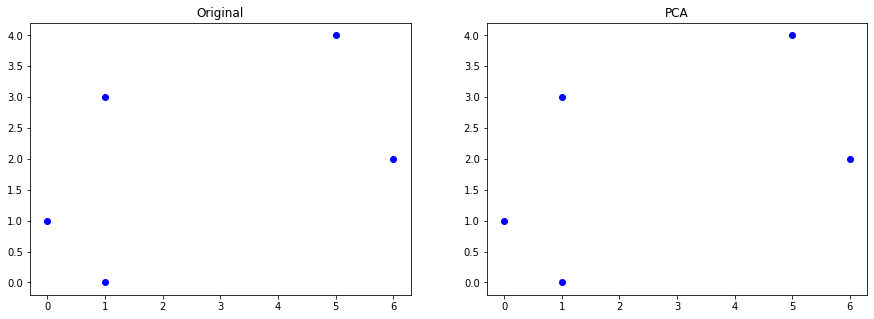

In [24]:
#retain first retainEigs eigenvectors, default is all
def dualPCA(points, retainEigs=-1):
    dimension = points.shape[0]
    nInputs = points.shape[1]

    #compute the mean
    mean = np.mean(points,1).reshape(dimension,1)

    pointsCentered = points - mean
    
    dualCovMat = pointsCentered.T@pointsCentered / (dimension -1 )

    u,s,vh = np.linalg.svd(dualCovMat, full_matrices=True)


    #1/x, kjer x!= 0 da ne delimo z 0
    temp = (s * (dimension-1))
    temp = np.where(temp > 1e-10, 1/temp, 0)

    #get the eigenvector space
    u = pointsCentered @ u @ np.diag(np.sqrt(temp))

    #if u want to reduce dimensionality
    #retain only first retainEigs eigenvectors
    if (retainEigs >= 0):
        u[:,retainEigs:] = 0


    #print(u)

    #print(u.shape)
    #print(u)

    projected = u.T@(pointsCentered)
    #print(projected.shape)

    #change in PCA space, delete this later
    #projected[0:32,0] = 0

    origSpace = u@projected + mean

    return origSpace, mean, u

points=np.loadtxt("data/points.txt")
points = points.T

plt.rcParams["figure.figsize"] = [15,5]
plt.subplot(121)
plt.title("Original")
plt.plot(points[0,:], points[1,:], 'bo')

origSpace, mean, u = dualPCA(points)

plt.subplot(122)
#plot values in original Space
plt.title("PCA")
plt.plot(origSpace[0,:], origSpace[1,:], 'bo')

plt.rcParams["figure.figsize"] = backupPlotSize

## 3. Image decomposition

### 3.a) Data preparation

In [25]:
seriesNum = 1

def getDataMatrix(seriesNum, height, width):
    path = "data/faces/" + str(seriesNum) + "/"

    mat = np.zeros((height*width, 1))

    for filename in os.listdir(path):
        image = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
        
        mat = np.append(mat, image.reshape(height*width, 1),axis=1)
    
    #popravi da se znebis prve, drugace noce appendat
    mat = mat[:,1:]

    return mat


image = cv2.imread(r"data\faces\1\001.png", cv2.IMREAD_GRAYSCALE)


imagePoints = getDataMatrix(1, 96, 84)

imagePoints.shape
        



(8064, 64)

### 3.b) Using dual PCA

Plot the first 5 eigenvectors as images

FIRST 5 eignenvectors as images


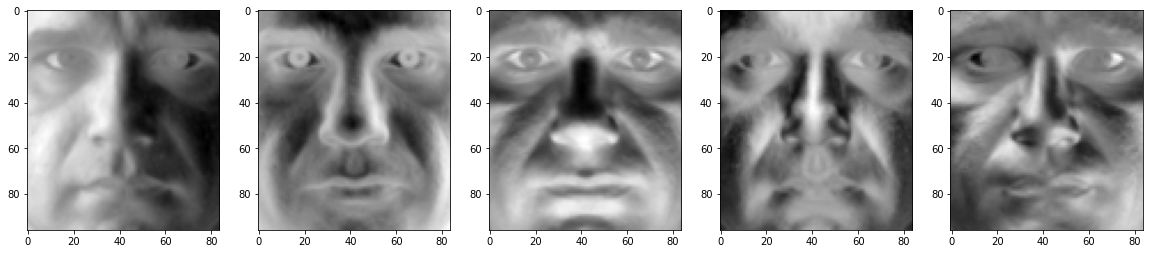

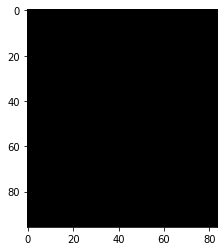

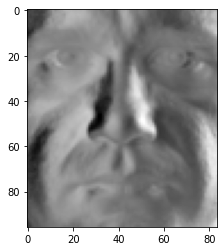

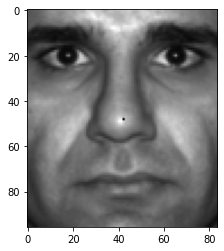

In [45]:
origSpace, mean, eigVectors =  dualPCA(imagePoints)

print("FIRST 5 eignenvectors as images")
plt.rcParams["figure.figsize"] = [20,5]
plt.subplot(151)
plt.imshow(eigVectors[:,0].reshape(96,84), cmap="gray")
plt.subplot(152)
plt.imshow(eigVectors[:,1].reshape(96,84), cmap="gray")
plt.subplot(153)
plt.imshow(eigVectors[:,2].reshape(96,84), cmap="gray")
plt.subplot(154)
plt.imshow(eigVectors[:,3].reshape(96,84), cmap="gray")
plt.subplot(155)
plt.imshow(eigVectors[:,4].reshape(96,84), cmap="gray")
plt.rcParams["figure.figsize"] = backupPlotSize

plt.show()



# #difference
plt.imshow((imagePoints[:,0] - origSpace[:,0]).reshape(96,84), cmap="gray", vmax=255 )
plt.show()

#ce spremenimo dobimo v PCA se cela slika spremeni
projI = eigVectors.T@(imagePoints - mean)
projI[5,:]=0
origSpaceI = eigVectors@projI + mean

plt.imshow((imagePoints[:,0] - origSpaceI[:,0]).reshape(96,84), cmap="gray")
plt.show()



# #isto dobim piko
origSpace[4074,0] = 0
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray")
plt.show()

origSpace[4074,0] = 0
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray")
plt.show()
#V image spacu ce nastavimo na 0 se spremeni 1 pixel na crno, v PCA spacu se cela slika posvetli

### 3.c) Effect of the number of components

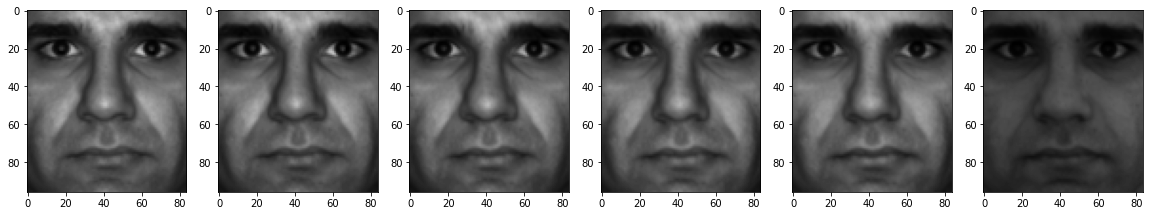

razlika v originalni in dobljena iz PCA ista slika: 5.9159717125112365e-09 ,ohranjeni vektorji:  64


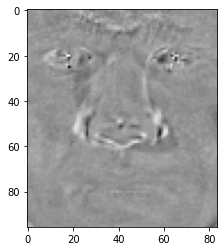

In [39]:
plt.rcParams["figure.figsize"] = [20,5]
plt.subplot(161)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 32)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.subplot(162)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 16)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.subplot(163)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 8)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.subplot(164)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 4)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.subplot(165)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 2)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.subplot(166)
origSpace, mean, eigVectors =  dualPCA(imagePoints, 1)
plt.imshow(origSpace[:,0].reshape(96,84), cmap="gray", vmax=255) #da vidmo da je potemnil
plt.rcParams["figure.figsize"] = backupPlotSize

plt.show()

#razlika med originalno in originalno preslikano v PCA je minimalna, pac numerika
nOfEigs = 64
origSpace, mean, eigVectors =  dualPCA(imagePoints, nOfEigs)
plt.imshow(imagePoints[:,0].reshape(96,84), cmap="gray", vmax=255)
print("razlika v originalni in dobljena iz PCA ista slika:", np.sum(np.abs(imagePoints[:,0]- origSpace[:,0])), ",ohranjeni vektorji: ",nOfEigs)

plt.imshow((imagePoints[:,0] - origSpace[:,0]).reshape(96,84), cmap="gray")
plt.show()



### 3.e) Reconstruction of a foreign image

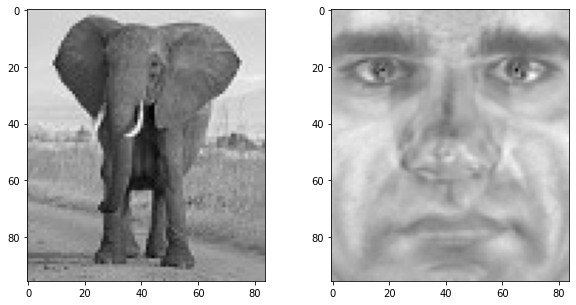

In [28]:
elephant = cv2.imread(r"data\elephant.jpg", cv2.IMREAD_GRAYSCALE)

elephant  = elephant.reshape(96*84, 1)


origSpace, mean, u =  dualPCA(imagePoints)


projectedEle = u.T@(elephant - mean)
origSpaceEle = u@projectedEle + mean

plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(121)
plt.imshow(elephant[:,0].reshape(96,84), cmap="gray")

plt.subplot(122)
plt.imshow(origSpaceEle[:,0].reshape(96,84), cmap="gray")
plt.rcParams["figure.figsize"] = backupPlotSize

### 3.e) Linear discriminant analysis

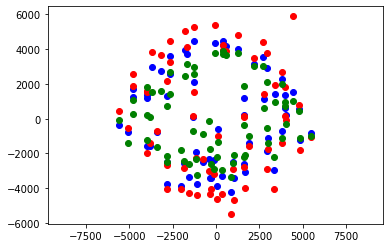

(8064, 192)
(192, 192)
mean (192,)


In [29]:
imagePoints1 = getDataMatrix(1, 96, 84)
origSpace1, mean1, u1 =  dualPCA(imagePoints1)
imagePoints2 = getDataMatrix(2, 96, 84)
origSpace2, mean2, u2 =  dualPCA(imagePoints2)
imagePoints3 = getDataMatrix(3, 96, 84)
origSpace3, mean3, u3 =  dualPCA(imagePoints3)

#project them into 2d pca subspace
proj1 = u1[:,0:2].T@(imagePoints1 - mean1)
proj2 = u1[:,0:2].T@(imagePoints2 - mean2)
proj3 = u1[:,0:2].T@(imagePoints3 - mean3)

plt.plot(proj1[0,:], proj1[1,:], 'bo')
plt.plot(proj1[0,:], proj2[1,:], 'ro')
plt.plot(proj1[0,:], proj3[1,:], 'go')

plt.axis("equal")
plt.show()


conCatImg = np.concatenate((imagePoints1, imagePoints2, imagePoints3), axis=1)

print(conCatImg.shape)

origSpace4, mean4, u4 =  dualPCA(conCatImg)
proj4 = u4.T@(conCatImg - mean4)


print(proj4.shape)
mm=np.mean(proj4, 1)

print("mean", mm.shape)


def lda(X,c,n):
    # X: input samples in columns, arranged by classes
    # c, n: number of classes, number of samples per class
    # W: LDA subspace basis vectors
    #Ms: class means in the LDA subspace
    Ms=np.zeros((n*c,c))
    sb=np.zeros((n*c, n*c))
    sw=np.zeros((n*c, n*c))
    mm=np.mean(X,1) #overall mean

    print(mm.shape)

    for i in range(c):

        # Ms(:,i)=mean(X(:,(i-1)*n+1:i*n)')'; %class means
        # SB=SB+n*(Ms(:,i)-MM)*(Ms(:,i)-MM)';

        Ms[:,i]=np.mean(X[:,(i)*n:(i+1)*n], 1) # %class means
        sb=sb+n*np.array((Ms[:,i]-mm)).T@ np.array((Ms[:,i]-mm)) #between class scatter m.
        for j in range(n): # within class scatter matrix
            #print(X.shape, Ms.shape)
            # SW = SW + (X(:,(i-1) * n + j) - Ms(:,i)) * (X(:,(i-1) * n + j) - Ms(:,i))';
            sw=sw+np.array((X[:,(i)*n+j]-Ms[:,i])).T@np.array(X[:,(i)*n+j]-Ms[:,i])

    print(sw.shape, sb.shape)
    #the solution of a generalized eigenproblem:
    #[W, EIGD] = np.linalg.eig((np.linalg.inv(sw)*sb))
    w, v =  np.linalg.eig((np.linalg.inv(sw)@sb))
    indexSorted=w.argsort()[::-1]
    w=w[indexSorted]
    v = v[:,indexSorted]
    Ms=w.T @ Ms #map means into the LDA space
    return w,Ms 

# print(imagePoints1.shape)

# w,Ms = lda(proj4[0:50, :], 3, 64)

# plt.plot(w[0,0:64], w[1,0:64], 'bo')
# plt.plot(w[0,64:128], w[1,64:128], 'ro')
# plt.plot(w[0,128:192], w[1,128:192], 'go')


#np.concatenate((imagePoints1, imagePoints2, imagePoints3), axis=1).shape

### 3.d) Informativeness of each component

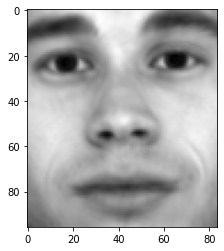

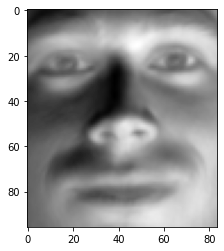

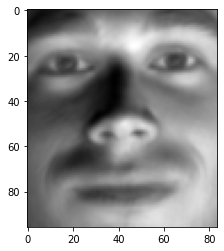

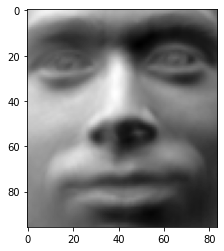

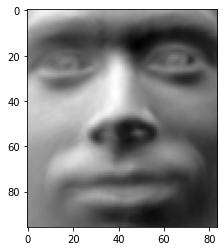

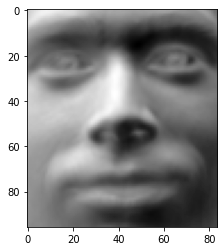

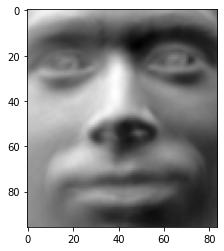

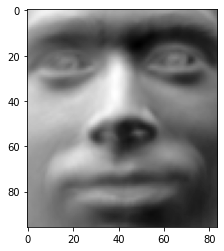

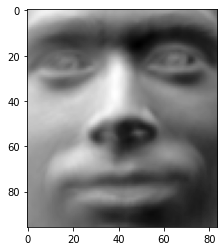

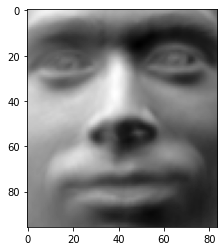

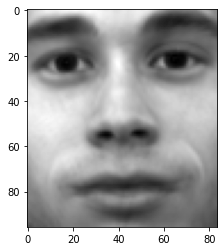

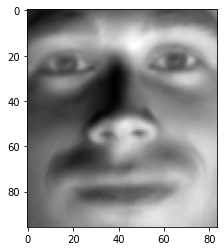

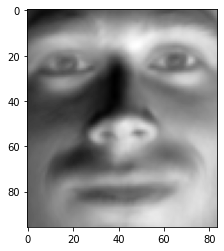

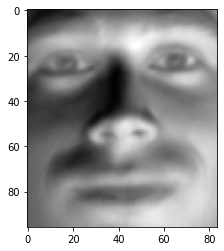

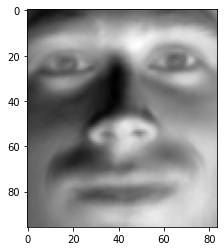

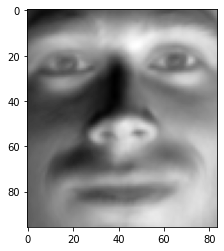

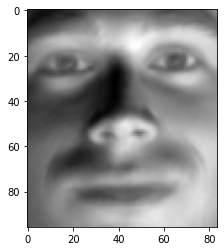

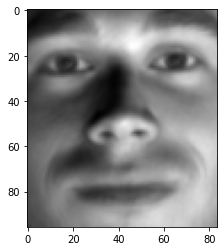

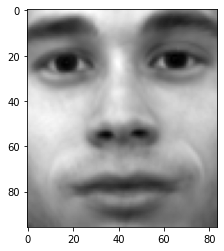

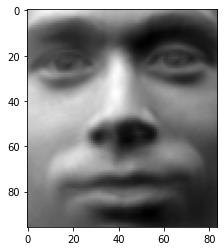

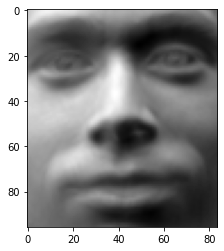

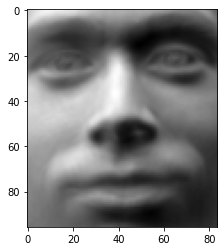

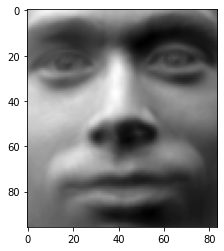

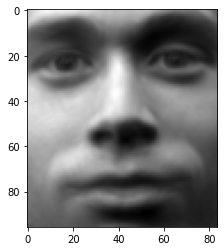

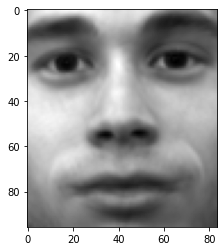

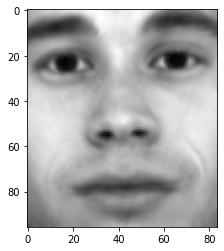

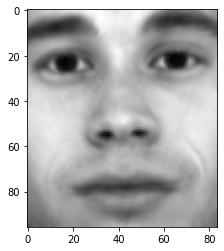

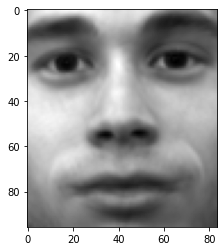

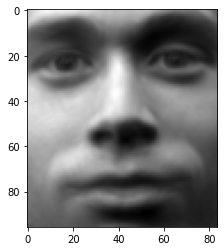

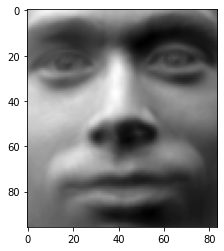

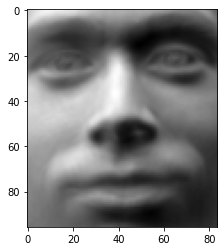

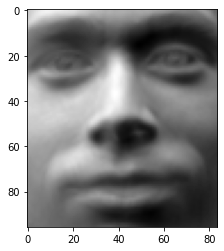

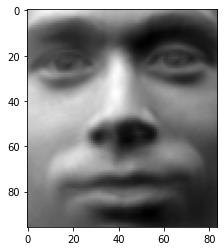

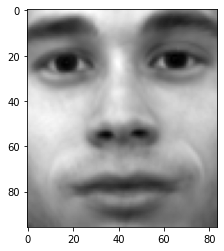

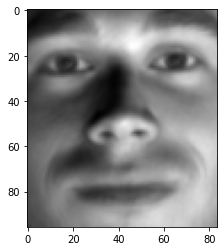

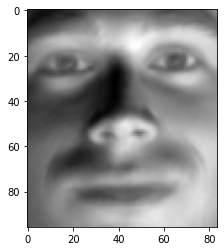

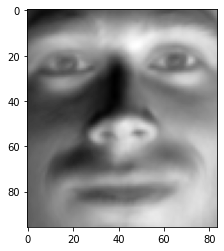

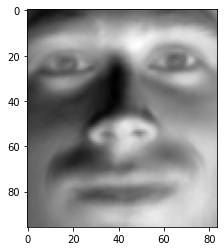

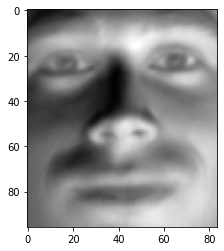

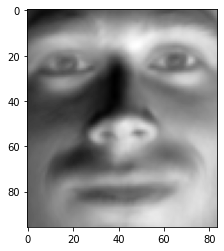

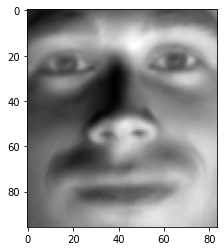

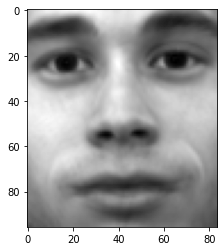

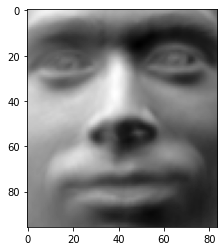

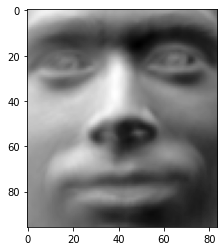

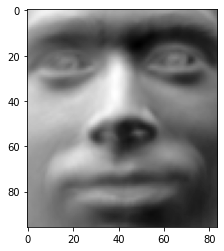

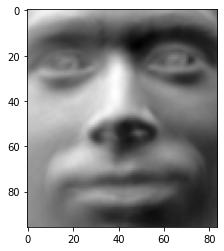

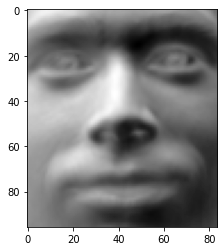

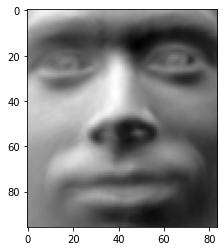

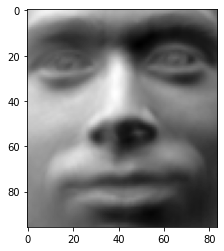

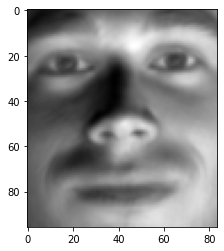

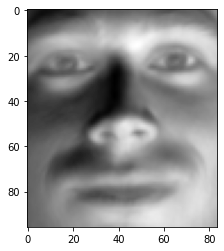

In [30]:
imagePoints2 = getDataMatrix(2, 96, 84)
origSpace, mean, u =  dualPCA(imagePoints2)

meanImg = np.copy(mean)

plt.imshow(meanImg.reshape(96,84), cmap="gray")
plt.show()

space = np.linspace(-10,10)
scale = 3000

for x in space:
    proj = u.T@(meanImg - mean)
    proj[1,:] = x * np.sin(x) * scale
    proj[2,:] = x * np.sin(x) * scale

    orig = u@proj + mean
    plt.imshow(orig.reshape(96,84), cmap="gray")
    plt.draw()
    plt.pause(0.1)





